In [1]:
import requests
import pandas as pd
from typing import Dict, List
from dataclasses import dataclass
from datetime import datetime
from web3 import Web3, HTTPProvider

In [2]:
def fetch_curve_markets(chain: str = "ethereum") -> Dict:
    """
    Fetch crvUSD market data from Curve API
    """
    url = f"https://prices.curve.fi/v1/lending/markets/{chain}"
    params = {
        "fetch_on_chain": "false",
    }
    
    response = requests.get(url, params=params)
    response.raise_for_status()  # Raise exception for bad status codes
    
    return response.json()

def get_markets_df() -> pd.DataFrame:
    """
    Fetch market data and return as a pandas DataFrame
    """
    raw_data = fetch_curve_markets()
    
    return pd.DataFrame(raw_data["data"])


In [3]:
markets_df = get_markets_df()
markets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    28 non-null     object 
 1   controller              28 non-null     object 
 2   vault                   28 non-null     object 
 3   llamma                  28 non-null     object 
 4   policy                  28 non-null     object 
 5   oracle                  28 non-null     object 
 6   oracle_pools            28 non-null     object 
 7   rate                    28 non-null     float64
 8   borrow_apy              28 non-null     float64
 9   lend_apy                28 non-null     float64
 10  n_loans                 28 non-null     int64  
 11  price_oracle            28 non-null     float64
 12  amm_price               28 non-null     float64
 13  base_price              28 non-null     float64
 14  total_debt              28 non-null     floa

In [4]:
markets_df.head()


,name,controller,vault,llamma,policy,oracle,oracle_pools,rate,borrow_apy,lend_apy,...,loan_discount,liquidation_discount,min_band,max_band,collateral_balance,borrowed_balance,collateral_balance_usd,borrowed_balance_usd,collateral_token,borrowed_token
0,XAUM-long,0xB4544e705665e0856961a51F7E86Ccf633404b86,0x7f1D0f4Dbb906b2D8a7CED488B96Fcad7643E492,0x527e37764C33E66e7955f0813F201212cd4775A1,0xc5EB73152C293eB4739f83F2E3b240948c795b5b,0x13cCa622e90b3294eb006Be3A6DF90ADF44Fe451,[],1.690789e+09,5.476789,3.483829,...,5.000000e+16,4.000000e+16,0,1013,11.010000,0.0,28792.674885,0.0,"{'symbol': 'XAUM', 'address': '0x2103E845C5E13...","{'symbol': 'crvUSD', 'address': '0xf939E0A03FB..."
1,RCH-Long,0xf8C27436B277734AAA726A8fD5e6D7daDe0296c5,0xc9cCB6E3Cc9D1766965278Bd1e7cc4e58549D1F8,0x062811f90cDa4830FBDe96051D22013242a91F48,0x958dD381b6091d1088D639a5389EC67145d15708,0x9A50ffCadc93B85DAcf96Ad642BC61664309648d,[0x017433c8Be1ce841D2d1B9bFfD577A6b74CF302c],3.170979e+08,1.005017,0.000000,...,1.050000e+17,7.500000e+16,0,15,0.000000,0.0,0.000000,0.0,"{'symbol': 'RCH', 'address': '0x57B96D4aF69860...","{'symbol': 'crvUSD', 'address': '0xf939E0A03FB..."
2,LBTC-Long,0xC28C2FD809FC1795f90de1C9dA2131434A77721d,0x88BDDB9293F3EFa2ceA349E184c656Ae0817aC87,0x62c265b8c07696057bA4C25E5A172891e58B9340,0x04a3F80D3B845A5c036bdD6658AF9b292D6161A2,0x6b9e333d34FD67933a11AcC9457E2c0bC217cf2f,[0x2f3bC4c27A4437AeCA13dE0e37cdf1028f3706F0],0.000000e+00,0.000000,0.000000,...,6.500000e+16,3.500000e+16,0,0,0.000000,0.0,0.000000,0.0,"{'symbol': 'LBTC', 'address': '0x8236a87084f8B...","{'symbol': 'crvUSD', 'address': '0xf939E0A03FB..."
3,ynETH-short,0x757C61d89bD0406BfcBB68178BBfaE79ECa46c0f,0x2707FeB6C0F9bf53b7e0c108d50b15fD7B32701f,0x25da33e47Ecf2e241DdA49a9d4B4f4e3Af964e3d,0x36A02815a1118305369bd02ac1eF6E20d3CD59d8,0x63f01b695c67B764e823F972bc61fcAFbac5102b,"[0x19B8524665aBAC613D82eCE5D8347BA44C714bDd, 0...",0.000000e+00,0.000000,0.000000,...,1.300000e+17,1.000000e+17,0,0,0.000000,0.0,0.000000,0.0,"{'symbol': 'crvUSD', 'address': '0xf939E0A03FB...","{'symbol': 'ynETH', 'address': '0x09db87A538BD..."
4,ynETH-long,0x143985860EFaeAcB92Db23E4b0c4d66Be51b08D2,0x52036c9046247C3358c987A2389FFDe6Ef8564c9,0x1785e3AEc59fC7FfDc665C1dB1F0D16A43Ca9de2,0x7Eb97024915961973a53c2231C55C814E35EeB2c,0x63f01b695c67B764e823F972bc61fcAFbac5102b,"[0x19B8524665aBAC613D82eCE5D8347BA44C714bDd, 0...",2.460290e+09,8.067701,5.682817,...,1.300000e+17,1.000000e+17,-6,382,45.333619,0.0,153020.536985,0.0,"{'symbol': 'ynETH', 'address': '0x09db87A538BD...","{'symbol': 'crvUSD', 'address': '0xf939E0A03FB..."


In [5]:
markets_dict = markets_df.to_dict(orient="records")


---

In [6]:
def fetch_market_snapshots(market_address: str, chain: str = "ethereum", agg: str = "day") -> pd.DataFrame:
   """
   Fetch historical snapshots for a specific crvUSD market
   
   Parameters:
   -----------
   market_address : str
       The market address to fetch snapshots for
   chain : str
       The blockchain network (default: "ethereum")
   agg : str
       Aggregation period - 'day' or 'hour' (default: "day")
   """
   # Ensure we're using checksum address
   w3 = Web3()
   market_address = w3.to_checksum_address(market_address)
   
   # Updated URL structure to match the new endpoint
   url = f"https://prices.curve.fi/v1/lending/markets/{chain}/{market_address}/snapshots"
   params = {
       "fetch_on_chain": "false",
       "agg": agg,
       "sort_by": "DATE_DESC"  # Added sort parameter
   }
   
   response = requests.get(url, params=params)
   response.raise_for_status()
   
   # Convert to DataFrame
   df = pd.DataFrame(response.json()['data'])
   
   
   return df

In [7]:
# Get market address from our markets map
market_address = "0x74f88Baa966407b50c10B393bBD789639EFfE78B"  # USDe
snapshots_df = fetch_market_snapshots(market_address)

snapshots_df["supplied"] = snapshots_df["total_assets_usd"]
snapshots_df["borrowed"] = snapshots_df["total_debt_usd"]
snapshots_df["collateral"] = snapshots_df["collateral_balance_usd"]
snapshots_df["collateral_crvUSD"] = snapshots_df["borrowed_balance_usd"]
snapshots_df["total_collateral"] = snapshots_df["collateral"] + snapshots_df["collateral_crvUSD"]

snapshots_df["hhi"] = snapshots_df["sum_debt_squared"]
snapshots_df["hhi_ideal"] = (snapshots_df["borrowed"]**2)/snapshots_df["n_loans"]
snapshots_df["hhi_ratio"] = snapshots_df["hhi"]/snapshots_df["hhi_ideal"]
    

snapshots_df["cr_ratio"] = snapshots_df["total_collateral"] / snapshots_df["borrowed"]
snapshots_df["cr_ratio_30d"] = snapshots_df["cr_ratio"].rolling(30).mean()
snapshots_df["cr_ratio_7d"] = snapshots_df["cr_ratio"].rolling(7).mean()
snapshots_df["cr_7d/30d"] = snapshots_df["cr_ratio_7d"] / snapshots_df["cr_ratio_30d"]


# Basic info about the data
print("\nDataFrame Info:")
print(snapshots_df.info())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rate                    100 non-null    float64
 1   borrow_apy              100 non-null    float64
 2   lend_apy                100 non-null    float64
 3   liquidation_discount    100 non-null    float64
 4   loan_discount           100 non-null    float64
 5   n_loans                 100 non-null    int64  
 6   price_oracle            100 non-null    float64
 7   amm_price               100 non-null    float64
 8   base_price              100 non-null    float64
 9   total_debt              100 non-null    float64
 10  total_assets            100 non-null    float64
 11  total_debt_usd          100 non-null    float64
 12  total_assets_usd        100 non-null    float64
 13  minted                  100 non-null    float64
 14  redeemed                10

In [8]:
def plot_market_metrics(df: pd.DataFrame, columns: List[str], title: str = "Market Metrics Over Time", figsize: tuple = (12, 6)):
    """
    Plot multiple metrics from market snapshots over time
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame containing market snapshots data
    columns : List[str]
        List of column names to plot
    title : str
        Plot title (default: "Market Metrics Over Time")
    figsize : tuple
        Figure size in inches (default: (12, 6))
    """
    import matplotlib.pyplot as plt
    
    # Create the plot
    plt.figure(figsize=figsize)
    
    # Plot each metric
    for column in columns:
        if column in df.columns:
            plt.plot(df.index, df[column], label=column, linewidth=2)
        else:
            print(f"Warning: Column '{column}' not found in DataFrame")
    
    # Customize the plot
    plt.title(title, fontsize=14, pad=15)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    plt.show()


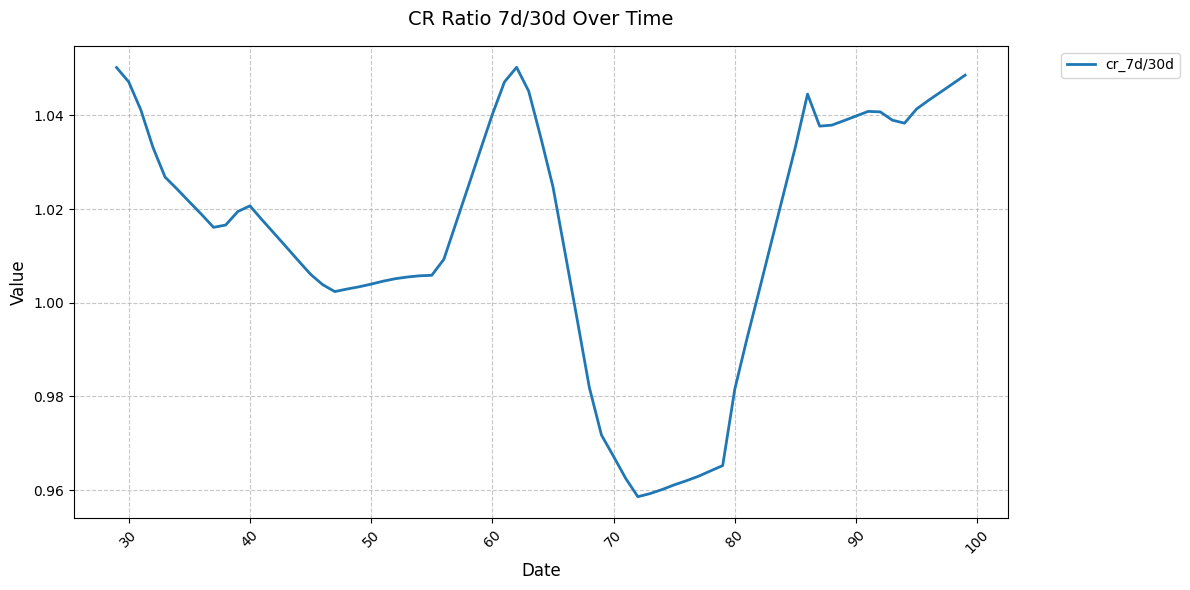

In [9]:
# Plot total debt and collateral amount over time
metrics_to_plot = ['cr_7d/30d']
plot_market_metrics(snapshots_df, metrics_to_plot, "CR Ratio 7d/30d Over Time")


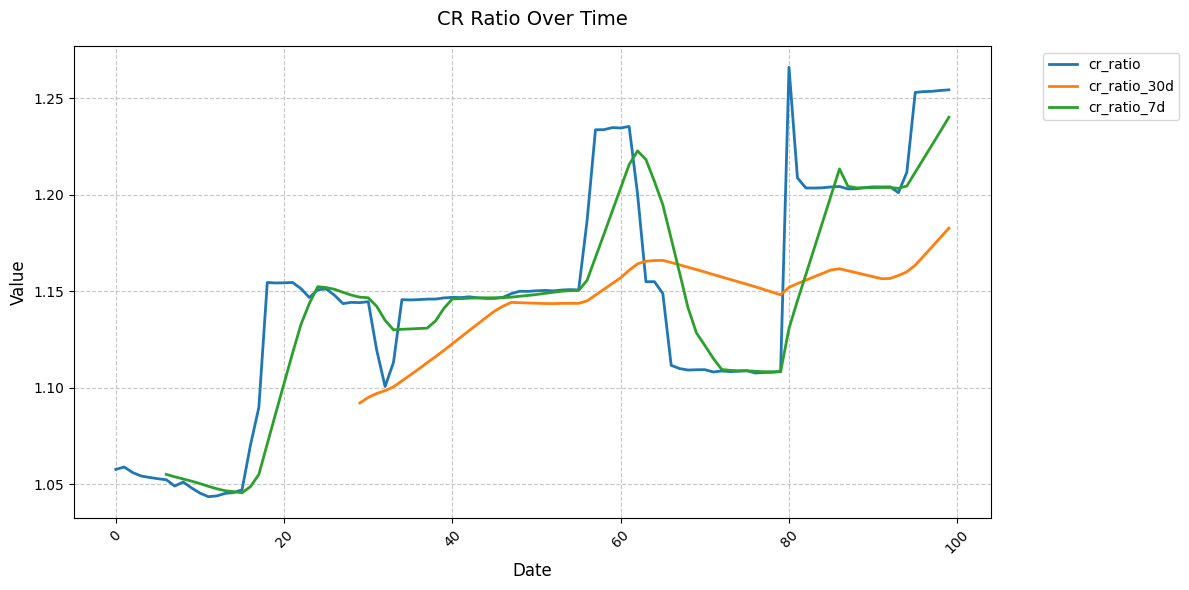

In [10]:
# Plot total debt and collateral amount over time
metrics_to_plot = ['cr_ratio', 'cr_ratio_30d', 'cr_ratio_7d']
plot_market_metrics(snapshots_df, metrics_to_plot, "CR Ratio Over Time")


---

In [11]:
def score_bad_debt(bad_debt: float,
                   current_debt: float) -> float:
    
    if bad_debt == 0:
        return 1.0
    elif bad_debt < 0.001 * current_debt:
        # score between 0.5 and 1
        return 0.5 + 0.5 * (bad_debt / (0.001 * current_debt))
    elif bad_debt < 0.01 * current_debt:
        # score between 0 and 0.5
        return 0.5 * (bad_debt / (0.01 * current_debt))
    else:
        return 0.0

def get_market_health(market_address: str, 
                      chain: str = "ethereum") -> pd.DataFrame:
    """
    Fetch historical snapshots for a specific crvUSD market
    
    Parameters:
    -----------
    market_obj : Market
        The market address to fetch snapshots for
    chain : str
        The blockchain network (default: "ethereum")
    agg : str
        Aggregation period - 'day' or 'hour' (default: "day")
    """
    # market_address = market_obj.controller
    url = f"https://prices.curve.fi/v1/lending/liquidations/{chain}/{market_address}/overview"
    params = {
        "fetch_on_chain": "false"
    }
    
    response = requests.get(url, params=params)
    response.raise_for_status()
    
    return response.json()
    
latest_snapshot = snapshots_df.iloc[-1].to_dict()
health = get_market_health(market_address, "ethereum")

bad_debt_score = score_bad_debt(health["bad_debt"], latest_snapshot["total_debt"])


In [12]:
bad_debt_score

1.0

---

In [18]:
import time
import os
import numpy as np
import scipy.stats as stats

# Current unix timestamp (as integer)
now = int(datetime.now().timestamp())
six_months_ago = int(now - 180*24*60*60)

def defillama_price(token_address: str, query_time_from: int = six_months_ago, chain: str = "ethereum"):
    """
    Fetch price data from DefiLlama API for a given market's collateral token
    
    Parameters:
    -----------
    token_address : str
        The token address to fetch prices for
    chain : str
        The blockchain network (default: "ethereum")
        
    Returns:
    --------
    pd.DataFrame
        DataFrame containing timestamp and price data
    """
    # token_address = market_obj.token
    
    current_timestamp = int(datetime.now().timestamp())
    last_round_ts = query_time_from
    price_data_join = []
    
    while last_round_ts + 4000 < current_timestamp:
        url = f"https://coins.llama.fi/chart/{chain}:{token_address}"
                
        params = {
            "start": last_round_ts,
            "span": 500,
            "period": "1h"  # hourly data
        }
        
        response = requests.get(url, params)
                
        # Extract price data from response
        price_data = response.json()["coins"][f"{chain}:{token_address}"]["prices"]
        
        # Update timestamp for next iteration
        last_round_ts = price_data[-1]["timestamp"]
        
        # Append price_data into price_data_join
        price_data_join.extend(price_data)
        
        # Add a small delay to avoid rate limiting
        time.sleep(0.5)
    
    # Convert combined data to DataFrame
    df = pd.DataFrame(price_data_join)
    
    # Convert timestamp to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
    
    # Remove any duplicates that might have occurred at chunk boundaries
    df = df.drop_duplicates(subset='timestamp')
    
    # Sort by timestamp
    df = df.sort_values('timestamp')
    
    return df

def create_daily_ohlc(df: pd.DataFrame) -> pd.DataFrame:
    """
    Convert hourly price data into daily OHLC (Open, High, Low, Close) data
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame with 'timestamp' and 'price' columns containing hourly data
        
    Returns:
    --------
    pd.DataFrame
        DataFrame with daily OHLC data
    """
    # Set timestamp as index if it's not already
    if 'timestamp' in df.columns:
        df = df.set_index('timestamp')
    
    # Resample to daily frequency and calculate OHLC
    daily_ohlc = pd.DataFrame({
        'open': df['price'].resample('D').first(),
        'high': df['price'].resample('D').max(),
        'low': df['price'].resample('D').min(),
        'close': df['price'].resample('D').last()
    })
    
    return daily_ohlc

def get_ohlc(token_address: str, chain: str = "ethereum") -> pd.DataFrame:
   """
   Get OHLC price data for a market, using cached CSV data when available
   and fetching only missing data from DefiLlama
   
   Parameters:
   -----------
   token_address : str
       Token address to fetch price data for
   chain : str
       Blockchain network (default: "ethereum")
       
   Returns:
   --------
   pd.DataFrame
       DataFrame with daily OHLC price data
   """
   # Create data directory if it doesn't exist
   data_dir = "data"  # Changed from "curve_research/data" to "data"
   os.makedirs(data_dir, exist_ok=True)
   
   csv_path = os.path.join(data_dir, f"{token_address}_ohlc.csv")
   
   if os.path.exists(csv_path):
       # Load existing data
       df_existing = pd.read_csv(csv_path)
       df_existing.set_index('timestamp', inplace=True)
       df_existing.index = pd.to_datetime(df_existing.index)
       
       # Check if we need to fetch new data
       current_date = pd.Timestamp.now()
       last_date = df_existing.index.max()
       
       if (current_date - last_date).days > 1:
           # Calculate the timestamp to fetch from
           query_time_from = int(last_date.timestamp())
           
           # Fetch only missing data
           df_new = defillama_price(token_address, query_time_from, chain)
           df_new = df_new[df_new['timestamp'] > last_date]
           
           if not df_new.empty:
               # Convert new data to OHLC
               df_new_ohlc = create_daily_ohlc(df_new)
               
               # Combine old and new data
               df_combined = pd.concat([df_existing, df_new_ohlc])
               df_combined = df_combined[~df_combined.index.duplicated(keep='last')]
               df_combined = df_combined.sort_index()
               
               # Save updated data
               df_combined.to_csv(csv_path)
               return df_combined
           
           return df_existing
       return df_existing
   else:
       # No existing data, fetch all
       df = defillama_price(token_address, six_months_ago, chain)
       df_ohlc = create_daily_ohlc(df)
       
       # Save to CSV
       df_ohlc.to_csv(csv_path)
       return df_ohlc

def gk_volatility(df):
    """
    Calculate Garman-Klass volatility with proper error handling
    """
    log_hl = np.log(df['high'] / df['low'])
    log_co = np.log(df['close'] / df['open'])
    
    # Calculate variance
    variance = (0.5 * log_hl.pow(2) - (2 * np.log(2) - 1) * log_co.pow(2)).mean()
    
    # Handle negative variance
    if variance <= 0:
        return np.nan
        
    return np.sqrt(variance)


def calculate_recent_gk_beta(asset_df: pd.DataFrame, 
                             btc_df: pd.DataFrame) -> float:
    """
    Calculate a single Garman-Klass beta value using the most recent days of data
    
    Parameters:
    -----------
    asset_df : pd.DataFrame
        DataFrame with asset OHLC data
    index_df : pd.DataFrame
        DataFrame with index OHLC data
    days : int
        Number of recent days to consider (default: 30)
        
    Returns:
    --------
    float
        Single GK beta value for the period
    """
        
    # Calculate returns for correlation
    asset_returns = np.log(asset_df['close'] / asset_df['close'].shift(1))
    btc_returns = np.log(btc_df['close'] / btc_df['close'].shift(1))
    
    # Calculate correlation
    correlation = asset_returns.corr(btc_returns)
    
    # Calculate volatilities
    asset_gk_vol = gk_volatility(asset_df)
    btc_gk_vol = gk_volatility(btc_df)
    
    # Calculate GK beta
    gk_beta = correlation * (asset_gk_vol / btc_gk_vol)
    
    return gk_beta

def analyze_price_drops(token_address: str, 
                        btc_token_address: str, 
                        drop_thresholds=[0.075, 0.15]) -> dict:
    """
    Calculate probability of price drops using Garman-Klass volatility estimator
    
    Args:
        gc_id: CoinGecko ID for the asset
        drop_thresholds: List of drop thresholds as decimals (e.g., 0.075 for 7.5% drop)
        
    Returns:
        dict: Probabilities for each threshold
    """
    ohlc_df = get_ohlc(token_address) # 6 months of OHLC data
    btc_ohlc_df = get_ohlc(btc_token_address) # 6 months of OHLC data
           
    # Calculate daily returns using all OHLC data
    daily_returns = (ohlc_df['close'] - ohlc_df['open']) / ohlc_df['open']
    
    # Calculate true range based returns for better volatility estimation
    true_range_pct = (ohlc_df['high'] - ohlc_df['low']) / ohlc_df['open']
    
    # Combine both metrics for a more complete picture
    all_returns = pd.concat([daily_returns, true_range_pct])
    
    
    # Remove outliers beyond 5 standard deviations
    returns_mean = all_returns.mean()
    returns_std = all_returns.std()
    clean_returns = all_returns[np.abs(all_returns - returns_mean) <= (5 * returns_std)]
    
    # Fit a t-distribution (better for crypto's fat tails)
    params = stats.t.fit(clean_returns)
    df, loc, scale = params
    
    probabilities = {}
    for index, threshold in enumerate(drop_thresholds):
        # Calculate probability of a drop greater than the threshold
        prob_parametric = stats.t.cdf(-threshold, df, loc, scale)
        
        # Calculate historical probability
        prob_historical = len(daily_returns[daily_returns <= -threshold]) / len(daily_returns)
        
        probabilities[f"drop{index+1}"] = {
            'parametric_probability': float(prob_parametric),
            'historical_probability': float(prob_historical),
            'threshold_pct': float(threshold * 100)
        }
        
    beta = calculate_recent_gk_beta(ohlc_df, btc_ohlc_df)
    
    return probabilities, beta

In [28]:
for market in markets_dict:
    if market["controller"] == market_address:
        shortlisted_market = market

In [29]:
token_address = shortlisted_market["collateral_token"]["address"]
btc_token_address = "0x2260FAC5E5542a773Aa44fBCfeDf7C193bc2C599"


In [17]:
probabilities, beta = analyze_price_drops(token_address,
                                          btc_token_address,
                                          [0.075, 0.15])

print(probabilities)
print(beta)


{'drop1': {'parametric_probability': 0.0009091134802858753, 'historical_probability': 0.0, 'threshold_pct': 7.5}, 'drop2': {'parametric_probability': 0.0003082763852720453, 'historical_probability': 0.0, 'threshold_pct': 15.0}}
0.014664975174724431


In [19]:
def score_with_limits(score_this: float,
                      upper_limit: float, 
                      lower_limit: float,
                      direction: bool,
                      mid_limit: float = None) -> float:
    """
    Score the market based on the collateral ratio comparison
    
    Args:
        score_this (float): Value to be scored
        upper_limit (float): Upper boundary for scoring
        lower_limit (float): Lower boundary for scoring
        mid_limit (float): Middle point representing 0.5 score
        direction (bool): If True, higher values get higher scores
                        If False, lower values get higher scores
    
    Returns:
        float: Score between 0 and 1
    """
    
    if mid_limit is None:
        mid_limit = (upper_limit + lower_limit) / 2
    
    if direction:
        if score_this >= upper_limit:
            return 1.0
        elif score_this <= lower_limit:
            return 0.0
        else:
            # Score between lower and mid
            if score_this <= mid_limit:
                return 0.5 * (score_this - lower_limit) / (mid_limit - lower_limit)
            # Score between mid and upper
            else:
                return 0.5 + 0.5 * (score_this - mid_limit) / (upper_limit - mid_limit)
    else:
        if score_this >= upper_limit:
            return 0.0
        elif score_this <= lower_limit:
            return 1.0
        else:
            # Score between lower and mid
            if score_this <= mid_limit:
                return 1.0 - 0.5 * (score_this - lower_limit) / (mid_limit - lower_limit)
            # Score between mid and upper
            else:
                return 0.5 - 0.5 * (score_this - mid_limit) / (upper_limit - mid_limit)
    
    # Ensure score is between 0 and 1
    return max(0.0, min(1.0, score))

beta_score = score_with_limits(beta,2.5,0.5,False,1)
print(f"Beta Score: {beta_score}")
            
prob_drop1 = probabilities[f"drop1"]['parametric_probability']
prob_drop2 = probabilities[f"drop2"]['parametric_probability']

print(f"Prob Drop 1: {prob_drop1}")
print(f"Prob Drop 2: {prob_drop2}")

prob_drop1_score = score_with_limits(prob_drop1,0.03,0,False)
print(f"Prob Drop 1 Score: {prob_drop1_score}")
prob_drop2_score = score_with_limits(prob_drop2,0.0075,0,False)
print(f"Prob Drop 2 Score: {prob_drop2_score}")

aggregate_prob_drop_score = (0.5*prob_drop1_score + 0.5*prob_drop2_score)
print(f"Aggregate Prob Drop Score: {aggregate_prob_drop_score}")


Beta Score: 1.0
Prob Drop 1: 0.0009091134802858753
Prob Drop 2: 0.0003082763852720453
Prob Drop 1 Score: 0.9696962173238042
Prob Drop 2 Score: 0.9588964819637273
Aggregate Prob Drop Score: 0.9642963496437658


---

In [21]:
def calculate_volatility_ratio(token_address: str) -> tuple[float, float, float]:
    """
    Calculate volatility ratio using 15-day and 60-day rolling windows
    
    Args:
        market_obj: Market object containing contract addresses
        
    Returns:
        tuple: (15-day volatility, 60-day volatility, ratio of 15d/60d)
    """
    ohlc_df = get_ohlc(token_address)
    
    log_hl = np.log(ohlc_df['high'] / ohlc_df['low'])
    log_co = np.log(ohlc_df['close'] / ohlc_df['open'])
    
    # Calculate rolling components for both windows
    hl_90d = log_hl.pow(2).rolling(window=90).mean()
    co_90d = log_co.pow(2).rolling(window=90).mean()
    
    # print(f"HL 90d: {hl_90d}")    
    # print(f"CO 90d: {co_90d}")
    
    hl_30d = log_hl.pow(2).rolling(window=30).mean()
    co_30d = log_co.pow(2).rolling(window=30).mean()
    
    # print(f"HL 30d: {hl_30d}")
    # print(f"CO 30d: {co_30d}")
    
    # Calculate variances for the last point in each window
    variance_90d = (0.5 * hl_90d - (2 * np.log(2) - 1) * co_90d).iloc[-1]
    variance_30d = (0.5 * hl_30d - (2 * np.log(2) - 1) * co_30d).iloc[-1]
    
    # print(f"Variance 90d: {variance_90d}")
    # print(f"Variance 30d: {variance_30d}")
    
    
    # Convert to daily volatility
    vol_90d = np.sqrt(max(variance_90d, 0))
    vol_30d = np.sqrt(max(variance_30d, 0))
    
    # Calculate ratio (handle division by zero)
    ratio = vol_30d / vol_90d if vol_90d != 0 else 1.0
    
    return vol_30d, vol_90d, ratio


vol_45d, vol_180d, vol_ratio = calculate_volatility_ratio(token_address)

In [23]:
print(f"Vol 45d: {vol_45d}")
print(f"Vol 180d: {vol_180d}")
print(f"Vol Ratio: {vol_ratio}")

vol_ratio_score = score_with_limits(vol_ratio,1.5,0.75,False)
print(f"Vol Ratio Score: {vol_ratio_score}")

aggregate_vol_ratio_score = (0.4*vol_ratio_score + 0.6*beta_score)
print(f"Aggregate Vol Ratio Score: {aggregate_vol_ratio_score}")


Vol 45d: 0.00684898109850276
Vol 180d: 0.004725835222118453
Vol Ratio: 1.4492636278233508
Vol Ratio Score: 0.06764849623553221
Aggregate Vol Ratio Score: 0.6270593984942129


---

In [24]:
def get_soft_liquidation_ratio(market_controller: str, 
                               chain: str = "ethereum") -> pd.DataFrame:
    
    # controller = market_obj.controller
    
    url = f"https://prices.curve.fi/v1/lending/liquidations/{chain}/{market_controller}/soft_liquidation_ratio"
    params = {
        "start": six_months_ago,
        "end": now
    }
    
    response = requests.get(url, params=params)
    response.raise_for_status()
    
    # Convert to DataFrame
    data = response.json()['data']
    
    # Convert timestamp to datetime
    df = pd.DataFrame(data)
    
    # Sort chronologically first
    df = df.sort_values('timestamp')

    # Parse the timestamp column correctly
    df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%dT%H:%M:%S')
    
    df["debt_under_sl_ratio_7d"] = df["debt_under_sl_ratio"].rolling(7).mean()
    df["debt_under_sl_ratio_30d"] = df["debt_under_sl_ratio"].rolling(30).mean()
    
    df["collateral_under_sl_ratio_7d"] = df["collateral_under_sl_ratio"].rolling(7).mean()
    df["collateral_under_sl_ratio_30d"] = df["collateral_under_sl_ratio"].rolling(30).mean()
    
    df.set_index('timestamp', inplace=True)
    
    return df


def get_under_sl_ratios(market_controller: str, 
                        chain: str = "ethereum") -> tuple[float, float]:
    
    df = get_soft_liquidation_ratio(market_controller, chain)
    
    latest_row = df.iloc[-1].to_dict()
    
    current_collateral_under_sl_ratio = latest_row["collateral_under_sl_ratio"]
    
    # Handle division by zero case
    if latest_row["collateral_under_sl_ratio_30d"] == 0:
        relative_collateral_under_sl_ratio = 1.0  # Default value when denominator is zero
    else:
        relative_collateral_under_sl_ratio = latest_row["collateral_under_sl_ratio_7d"] / latest_row["collateral_under_sl_ratio_30d"]
    
    return current_collateral_under_sl_ratio, relative_collateral_under_sl_ratio


current_collateral_under_sl_ratio, relative_collateral_under_sl_ratio = get_under_sl_ratios(market_address)
            
print(f"Current Collateral Under SL Ratio: {current_collateral_under_sl_ratio}")
print(f"Relative Collateral Under SL Ratio: {relative_collateral_under_sl_ratio}")

collateral_under_sl_score = score_with_limits(current_collateral_under_sl_ratio, 2, 0, False)

print(f"Collateral Under SL Score: {collateral_under_sl_score}")

relative_collateral_under_sl_score = score_with_limits(relative_collateral_under_sl_ratio, 2.5, 0.5, False,1)

print(f"Relative Collateral Under SL Score: {relative_collateral_under_sl_score}")

aggregate_collateral_under_sl_score = (0.4*collateral_under_sl_score + 0.6*relative_collateral_under_sl_score)
print(f"Aggregate Collateral Under SL Score: {aggregate_collateral_under_sl_score}")


Current Collateral Under SL Ratio: 2.1932676425528403
Relative Collateral Under SL Ratio: 0.6695344459809639
Collateral Under SL Score: 0.0
Relative Collateral Under SL Score: 0.8304655540190361
Aggregate Collateral Under SL Score: 0.49827933241142164


---

In [30]:
shortlisted_market

{'name': 'susde-long',
 'controller': '0x74f88Baa966407b50c10B393bBD789639EFfE78B',
 'vault': '0xc687141c18F20f7Ba405e45328825579fDdD3195',
 'llamma': '0xF832F4d9087e474357Afb9C9A277CB23B9A136cB',
 'policy': '0x0753370B67758D6dBc20802cD76D8591a8929472',
 'oracle': '0xFb230bC3De97eE43d2501bCaab9A50bba9B69E1B',
 'oracle_pools': ['0xF55B0f6F2Da5ffDDb104b58a60F2862745960442'],
 'rate': 3598096936.0,
 'borrow_apy': 12.015781851607317,
 'lend_apy': 8.420277381903565,
 'n_loans': 27,
 'price_oracle': 0.9992129011707344,
 'amm_price': 0.9986275575629171,
 'base_price': 1.0337739902643437,
 'total_debt': 1296119.2257052627,
 'total_assets': 1819162.6967954242,
 'total_debt_usd': 1296119.2257052627,
 'total_assets_usd': 1819162.6967954242,
 'minted': 9238372.187481666,
 'redeemed': 7980196.936784568,
 'minted_usd': 9238372.187481666,
 'redeemed_usd': 7980196.936784568,
 'loan_discount': 1.5e+16,
 'liquidation_discount': 1e+16,
 'min_band': 0,
 'max_band': 1023,
 'collateral_balance': 1348972.936

---

In [ ]:
# # Missing Amp factor

# relative_cr_score = score_with_limits(cr_comparison["cr_7d/30d"],1.1,0.9,True)
# print(f"Relative CR Score: {relative_cr_score}")
# absolute_cr_score = score_with_limits(1/cr_comparison["cr_ratio"],0.75*market_obj.max_ltv,0.75*market_obj.min_ltv,False)
# print(f"Absolute CR Score: {absolute_cr_score}")

# aggregate_cr_score = (0.4*relative_cr_score + 0.6*absolute_cr_score)
# print(f"Aggregate CR Score: {aggregate_cr_score}")

---

In [31]:
latest_snapshot

{'rate': 2601904994.75,
 'borrow_apy': 8.551407411052855,
 'lend_apy': 5.377297923679514,
 'liquidation_discount': 1e+16,
 'loan_discount': 1.5e+16,
 'n_loans': 17,
 'price_oracle': 0.9990006008845597,
 'amm_price': 0.9980388302148249,
 'base_price': 1.014645304679987,
 'total_debt': 1405172.7414468052,
 'total_assets': 2201338.5024456275,
 'total_debt_usd': 1405172.7414468052,
 'total_assets_usd': 2201338.5024456275,
 'minted': 3812142.545992991,
 'redeemed': 2421051.021207715,
 'minted_usd': 3812142.545992991,
 'redeemed_usd': 2421051.021207715,
 'min_band': 0,
 'max_band': 1023,
 'collateral_balance': 1762575.5849098482,
 'borrowed_balance': 1683.3589738764902,
 'collateral_balance_usd': 1760814.0684293925,
 'borrowed_balance_usd': 1683.3589738764902,
 'sum_debt_squared': 6125904736289.686,
 'timestamp': '2024-09-15T00:00:00',
 'supplied': 2201338.5024456275,
 'borrowed': 1405172.7414468052,
 'collateral': 1760814.0684293925,
 'collateral_crvUSD': 1683.3589738764902,
 'total_collate

In [33]:
borrower_score = score_with_limits(latest_snapshot["hhi_ratio"],10,30,False)
print(f"Borrower Score: {borrower_score}")

Borrower Score: 0.0


In [ ]:
vrfbh

In [37]:
def fetch_liquidation_overview(market_address: str, chain: str = "ethereum") -> Dict:
    """
    Fetch liquidation overview data for a specific crvUSD market
    
    Parameters:
    -----------
    market_address : str
        The market address to fetch data for
    chain : str
        The blockchain network (default: "ethereum")
        
    Returns:
    --------
    Dict containing liquidation metrics including:
        - soft_liquidation_users
        - median_health
        - average_health
        - collat_ratio
        - bad_debt
        - liquidatable_positions
        - liquidatable metrics (debt, stablecoin, collateral) in both raw and USD terms
    """
    # Ensure we're using checksum address
    w3 = Web3()
    market_address = w3.to_checksum_address(market_address)
    
    url = f"https://prices.curve.fi/v1/crvusd/liquidations/{chain}/{market_address}/overview"
    params = {
        "fetch_on_chain": "false"
    }
    
    response = requests.get(url, params=params)
    response.raise_for_status()
    
    return response.json()



In [38]:
# Example usage:
market_address = "0x4e59541306910ad6dc1dac0ac9dfb29bd9f15c67"
liquidation_data = fetch_liquidation_overview(market_address)

In [39]:
liquidation_data

{'soft_liquidation_users': 8,
 'median_health': 83.47467718732736,
 'average_health': 95.73329831599692,
 'collat_ratio': 191.6313244390151,
 'bad_debt': 0.0,
 'liquidatable_positions': 0,
 'liquidatable_pos_debt': '0.00 crvUSD',
 'liquidatable_stablecoin': '0.00 crvUSD',
 'liquidatable_collateral': '0.00 WBTC',
 'liquidatable_pos_debt_usd': 0.0,
 'liquidatable_collateral_usd': 0.0,
 'liquidatable_stablecoin_usd': 0.0}

In [40]:
def fetch_liquidation_losses(market_address: str, chain: str = "ethereum") -> pd.DataFrame:
    """
    Fetch historical liquidation losses data for a specific crvUSD market
    
    Parameters:
    -----------
    market_address : str
        The market address to fetch data for
    chain : str
        The blockchain network (default: "ethereum")
        
    Returns:
    --------
    pd.DataFrame containing liquidation loss metrics including:
        - timestamp
        - median_pct_loss
        - avg_pct_loss
        - median_abs_loss
        - avg_abs_loss
        - total_users
        - users_with_losses
        - ratio
    """
    # Ensure we're using checksum address
    w3 = Web3()
    market_address = w3.to_checksum_address(market_address)
    
    url = f"https://prices.curve.fi/v1/crvusd/liquidations/{chain}/{market_address}/losses/history"
    params = {
        "fetch_on_chain": "false"
    }
    
    response = requests.get(url, params=params)
    response.raise_for_status()
    
    # Convert to DataFrame
    df = pd.DataFrame(response.json()['data'])
    
    # Process DataFrame
    if not df.empty:
        # Convert timestamp to datetime
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df.set_index('timestamp', inplace=True)
        
        # Sort by date ascending
        df.sort_index(inplace=True)
    
    return df


In [41]:
market_address = "0x4e59541306910ad6dc1dac0ac9dfb29bd9f15c67"
losses_df = fetch_liquidation_losses(market_address)

losses_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2024-08-03 to 2024-11-01
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   median_pct_loss    91 non-null     float64
 1   avg_pct_loss       91 non-null     float64
 2   median_abs_loss    91 non-null     float64
 3   avg_abs_loss       91 non-null     float64
 4   total_users        91 non-null     int64  
 5   users_with_losses  91 non-null     int64  
 6   ratio              91 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 5.7 KB


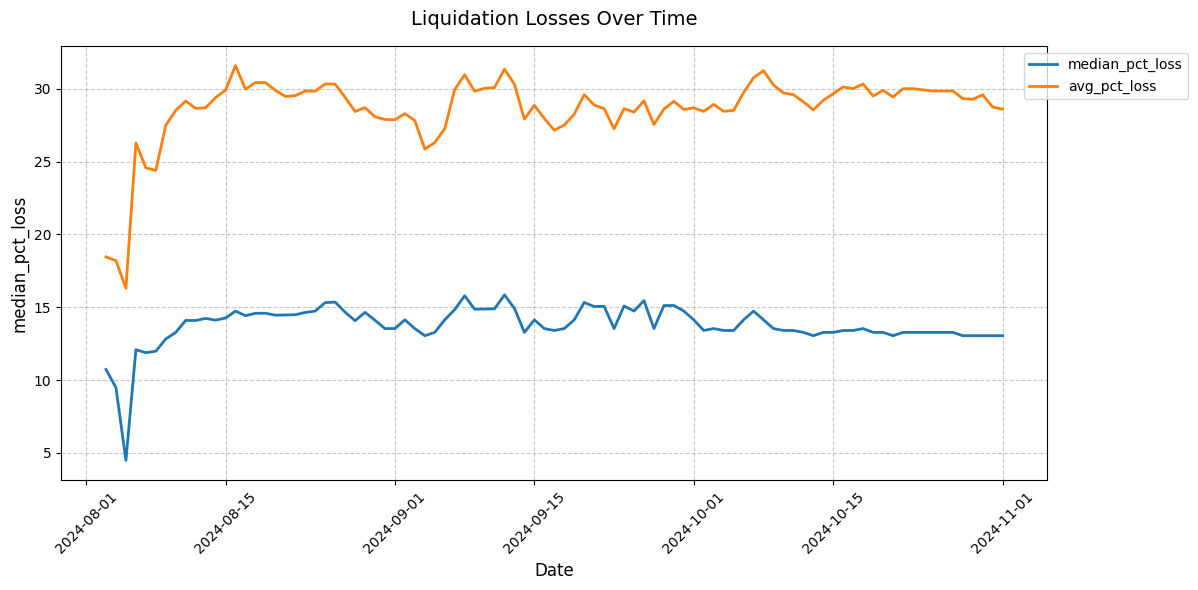

In [42]:
# Plot total debt and collateral amount over time
metrics_to_plot = ['median_pct_loss', 'avg_pct_loss']
plot_market_metrics(losses_df, metrics_to_plot, "Liquidation Losses Over Time")

In [44]:
def fetch_all_users(market_address: str, chain: str = "ethereum") -> pd.DataFrame:
    """
    Fetch all user data for a specific crvUSD market and store it in a DataFrame.
    
    Parameters:
    -----------
    market_address : str
        The market address to fetch user data for
    chain : str
        The blockchain network (default: "ethereum")
        
    Returns:
    --------
    pd.DataFrame containing user data including:
        - user address
        - first interaction timestamp
        - last interaction timestamp
    """
    page = 1
    per_page = 100
    all_users = []

    while True:
        url = f"https://prices.curve.fi/v1/crvusd/users/{chain}/{market_address}/users"
        params = {
            "page": page,
            "per_page": per_page
        }
        
        response = requests.get(url, params=params)
        response.raise_for_status()
        
        data = response.json()
        all_users.extend(data['data'])
        
        # Check if we have retrieved all data
        if page * per_page >= data['count']:
            break
        
        page += 1

    # Convert to DataFrame
    df = pd.DataFrame(all_users)
    
    # Convert timestamps to datetime
    df['first'] = pd.to_datetime(df['first'])
    df['last'] = pd.to_datetime(df['last'])
    
    return df


In [45]:
market_address = "0x4e59541306910ad6dc1dac0ac9dfb29bd9f15c67"
users_df = fetch_all_users(market_address)

print(users_df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   user    300 non-null    object        
 1   first   300 non-null    datetime64[ns]
 2   last    300 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 7.2+ KB
None


In [51]:
def filter_users_by_max_last_date(df: pd.DataFrame) -> pd.DataFrame:
    """
    Filter the DataFrame to extract users based on the maximum last active date (ignoring time).
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame containing user data with a 'last' column for last active date.
        
    Returns:
    --------
    pd.DataFrame
        Filtered DataFrame with users having the maximum last active date.
    """
    # Ensure 'last' column is in datetime format
    df['last'] = pd.to_datetime(df['last'])
    
    # Extract the date part from 'last' column
    df['last_date'] = df['last'].dt.date
    
    # Find the maximum date
    max_date = df['last_date'].max()
    
    # Filter the DataFrame to include only rows with the maximum date
    filtered_df = df[df['last_date'] == max_date]
    
    # Drop the 'last_date' column if not needed
    filtered_df = filtered_df.drop(columns=['last_date'])
    
    return filtered_df

In [52]:
# Assuming 'users_df' is  DataFrame with user data
filtered_users_df = filter_users_by_max_last_date(users_df)

# Print the first few rows of the filtered DataFrame
print(filtered_users_df.head())

                                         user               first  \
0  0x595b736e58F50Fc15373732C1fAB56d6E043Aef6 2024-09-06 19:30:23   
1  0x9E44418C03649A4db98980c0F674942828E2C813 2023-12-26 10:39:35   
2  0xfc1293798360553182ae58bCecdDD336E918dE4e 2023-08-04 23:45:47   
3  0x13dc93FC5C681d5D119782203F3CcCE7e16bAd16 2024-03-05 23:17:11   
4  0x891a534e7FbF12D34e74E9fFfA8f6FE28158D0D3 2024-02-27 10:09:47   

                 last  
0 2024-11-01 21:08:47  
1 2024-11-01 20:00:11  
2 2024-11-01 20:00:11  
3 2024-11-01 20:00:11  
4 2024-11-01 20:00:11  


In [53]:
filtered_users_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 0 to 201
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   user    202 non-null    object        
 1   first   202 non-null    datetime64[ns]
 2   last    202 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 6.3+ KB


In [58]:
def fetch_users_stats(user_addresses: List[str], market_address: str, chain: str = "ethereum") -> Dict[str, Dict]:
    """
    Fetch stats for multiple users from a specific crvUSD market
    
    Parameters:
    -----------
    user_addresses : List[str]
        List of user addresses to fetch stats for
    market_address : str
        The market address to fetch stats from
    chain : str
        The blockchain network (default: "ethereum")
        
    Returns:
    --------
    Dict[str, Dict]
        Dictionary mapping user addresses to their stats
    """
    # Initialize Web3 for checksum addresses
    w3 = Web3()
    market_address = w3.to_checksum_address(market_address)
    
    # Initialize results dictionary
    users_stats = {}
    
    for user_address in user_addresses:
        # Convert to checksum address
        user_address = w3.to_checksum_address(user_address)
        
        # Construct URL
        url = f"https://prices.curve.fi/v1/crvusd/users/{chain}/{user_address}/{market_address}/stats"
        
        try:
            response = requests.get(url)
            response.raise_for_status()
            
            # Store the stats in the dictionary with user address as key
            users_stats[user_address] = response.json()
            
        except requests.exceptions.RequestException as e:
            print(f"Error fetching data for user {user_address}: {str(e)}")
            users_stats[user_address] = None
            
    return users_stats

def create_users_stats_df(filtered_users_df: pd.DataFrame, market_address: str) -> pd.DataFrame:
    """
    Create a DataFrame with complete stats for all users from the filtered DataFrame
    
    Parameters:
    -----------
    filtered_users_df : pd.DataFrame
        DataFrame containing filtered user addresses
    market_address : str
        The market address to fetch stats from
        
    Returns:
    --------
    pd.DataFrame
        DataFrame containing all user stats
    """
    # Get list of user addresses from filtered DataFrame
    user_addresses = filtered_users_df['user'].tolist()
    
    # Fetch stats for all users
    users_stats = fetch_users_stats(user_addresses, market_address)
    
    # Create list to store processed data
    processed_data = []
    
    # Process each user's stats
    for user, stats in users_stats.items():
        if stats is not None:
            data = {
                'user': user,
                'health': stats.get('health'),
                'health_full': stats.get('health_full'),
                'n1': stats.get('n1'),
                'n2': stats.get('n2'),
                'n': stats.get('n'),
                'debt': stats.get('debt'),
                'collateral': stats.get('collateral'),
                'stablecoin': stats.get('stablecoin'),
                'soft_liquidation': stats.get('soft_liquidation'),
                'total_deposited': stats.get('total_deposited'),
                'loss': stats.get('loss'),
                'loss_pct': stats.get('loss_pct'),
                'collateral_up': stats.get('collateral_up'),
                'oracle_price': stats.get('oracle_price'),
                'block_number': stats.get('block_number'),
                'timestamp': pd.to_datetime(stats.get('timestamp'))
            }
            processed_data.append(data)
    
    # Create DataFrame from processed data
    stats_df = pd.DataFrame(processed_data)
    
    return stats_df


In [59]:
# Assuming filtered_users_df is your filtered DataFrame with user addresses
market_address = "0x4e59541306910ad6dc1dac0ac9dfb29bd9f15c67"
users_stats_df = create_users_stats_df(filtered_users_df, market_address)

# Display basic information about the new DataFrame
print("\nDataFrame Info:")
print(users_stats_df.info())

# Display first few rows
print("\nFirst few rows:")
print(users_stats_df.head())

Error fetching data for user 0xb587526953Ad321C1aB2eA26F7311d2aA1A98a4a: 500 Server Error: Internal Server Error for url: https://prices.curve.fi/v1/crvusd/users/ethereum/0xb587526953Ad321C1aB2eA26F7311d2aA1A98a4a/0x4e59541306910aD6dC1daC0AC9dFB29bD9F15c67/stats

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user              201 non-null    object        
 1   health            201 non-null    float64       
 2   health_full       201 non-null    float64       
 3   n1                201 non-null    int64         
 4   n2                201 non-null    int64         
 5   n                 201 non-null    int64         
 6   debt              201 non-null    float64       
 7   collateral        201 non-null    float64       
 8   stablecoin        201 non-null    float64       
 9   soft_liquidation

In [60]:
users_stats_df

,user,health,health_full,n1,n2,n,debt,collateral,stablecoin,soft_liquidation,total_deposited,loss,loss_pct,collateral_up,oracle_price,block_number,timestamp
0,0x595b736e58F50Fc15373732C1fAB56d6E043Aef6,4.339096,7.906014,-65,-62,4,69597.275845,1.174577,0.000000,False,1.237344,0.062767,5.072755,1.174577,69215.016799,21095904,2024-11-01 22:52:52.455596
1,0x9E44418C03649A4db98980c0F674942828E2C813,3.745485,89.538981,-13,-4,10,17588.418378,0.512801,0.000000,False,0.512801,0.000000,0.000000,0.512801,69215.016799,21095904,2024-11-01 22:52:53.082651
2,0xfc1293798360553182ae58bCecdDD336E918dE4e,4.202069,141.510718,11,14,4,50350.311291,1.821570,0.000000,False,1.821570,0.000000,0.000000,1.821570,69215.016799,21095904,2024-11-01 22:52:53.781388
3,0x13dc93FC5C681d5D119782203F3CcCE7e16bAd16,3.667697,282.736913,56,59,4,10690.695232,0.604829,0.000000,False,0.709353,0.104523,14.735026,0.604829,69215.016799,21095904,2024-11-01 22:52:54.330117
4,0x891a534e7FbF12D34e74E9fFfA8f6FE28158D0D3,3.419987,50.667755,-34,-25,10,66052.057248,1.554471,0.000000,False,1.554471,0.000000,0.000000,1.554471,69215.016799,21095904,2024-11-01 22:52:54.660832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0x7449023394Bb2eB814fF6793963453Ce50A30b5E,3.410818,86.923497,-14,-5,10,17287.321036,0.497372,0.000000,False,0.497372,0.000000,0.000000,0.497372,69217.627881,21095911,2024-11-01 22:54:23.113081
197,0x8B65c201b2b3EC9a45187513C92F34176a91EFeF,4.207082,261.707346,50,53,4,25920.127647,1.387806,0.000000,False,1.387806,0.000000,0.000000,1.387806,69217.627881,21095911,2024-11-01 22:54:23.482598
198,0x3cfa5D941DA8F15CF005c8aF7AF1759E0b1CCD6e,3.304001,50.504856,-34,-25,10,20711.953615,0.486889,0.000000,False,0.486889,0.000000,0.000000,0.486889,69217.627881,21095911,2024-11-01 22:54:23.992650
199,0x3D09AaF464624a7ee4E1dad2639120a31E0a46cC,3.718697,64.729709,-25,-22,4,102207.753750,2.563156,0.000000,False,2.615817,0.052661,2.013194,2.563156,69217.627881,21095911,2024-11-01 22:54:24.360340


In [61]:
def fetch_ohlc_data(
    pool_address: str, 
    main_token: str, 
    reference_token: str, 
    start_time: int, 
    end_time: int,
    chain: str = "ethereum",
    agg_number: int = 1,
    agg_units: str = "day"
) -> pd.DataFrame:
    """
    Fetch OHLC data for a specific pool and token pair
    
    Parameters:
    -----------
    pool_address : str
        The pool address
    main_token : str
        Address of the main token
    reference_token : str
        Address of the reference token
    start_time : int
        Start timestamp
    end_time : int
        End timestamp
    chain : str
        The blockchain network (default: "ethereum")
    agg_number : int
        Number of units for aggregation (default: 1)
    agg_units : str
        Unit for aggregation - 'day', 'hour', etc. (default: "day")
        
    Returns:
    --------
    pd.DataFrame
        DataFrame containing OHLC data with datetime index
    """
    # Initialize Web3 for checksum addresses
    w3 = Web3()
    pool_address = w3.to_checksum_address(pool_address)
    main_token = w3.to_checksum_address(main_token)
    reference_token = w3.to_checksum_address(reference_token)
    
    # Construct URL
    url = f"https://prices.curve.fi/v1/ohlc/{chain}/{pool_address}"
    
    params = {
        "main_token": main_token,
        "reference_token": reference_token,
        "agg_number": agg_number,
        "agg_units": agg_units,
        "start": start_time,
        "end": end_time
    }
    
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()
        
        # Convert to DataFrame
        df = pd.DataFrame(data['data'])
        
        # Convert timestamp to datetime and set as index
        df['time'] = pd.to_datetime(df['time'], unit='s')
        df = df.set_index('time')
        
        return df
        
    except requests.exceptions.RequestException as e:
        print(f"Error fetching OHLC data: {str(e)}")
        return None


---

In [17]:
import os
import pandas as pd
import numpy as np
from scipy import stats

def get_ohlc(gc_id) -> pd.DataFrame:
    
    # Gives the last 180 days of OHLC data
    
    url = f"https://api.coingecko.com/api/v3/coins/{gc_id}/ohlc?vs_currency=usd&days=365"

    headers = {
        "accept": "application/json",
        "x-cg-demo-api-key": os.getenv("GECKO_API_KEY")
    }

    response = requests.get(url, headers=headers)
    response.raise_for_status()
    
    # Convert to DataFrame
    df = pd.DataFrame(response.json(), columns=['timestamp', 'open', 'high', 'low', 'close'])
    
    # Convert timestamp to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)
    
    # Sort by timestamp ascending
    df.sort_index(inplace=True)
    
    return df


def analyze_price_drops(gc_id, drop_thresholds=[0.075, 0.15]) -> dict:
    """
    Calculate probability of price drops using Garman-Klass volatility estimator
    
    Args:
        gc_id: CoinGecko ID for the asset
        drop_thresholds: List of drop thresholds as decimals (e.g., 0.075 for 7.5% drop)
        
    Returns:
        dict: Probabilities for each threshold
    """
    ohlc_df = get_ohlc(gc_id)
    
    # Calculate daily returns using all OHLC data
    daily_returns = (ohlc_df['close'] - ohlc_df['open']) / ohlc_df['open']
    
    # Calculate true range based returns for better volatility estimation
    true_range_pct = (ohlc_df['high'] - ohlc_df['low']) / ohlc_df['open']
    
    # Combine both metrics for a more complete picture
    all_returns = pd.concat([daily_returns, true_range_pct])
    
    # Remove outliers beyond 5 standard deviations
    returns_mean = all_returns.mean()
    returns_std = all_returns.std()
    clean_returns = all_returns[np.abs(all_returns - returns_mean) <= (5 * returns_std)]
    
    # Fit a t-distribution (better for crypto's fat tails)
    params = stats.t.fit(clean_returns)
    df, loc, scale = params
    
    probabilities = {}
    for index, threshold in enumerate(drop_thresholds):
        # Calculate probability of a drop greater than the threshold
        prob_parametric = stats.t.cdf(-threshold, df, loc, scale)
        
        # Calculate historical probability
        prob_historical = len(daily_returns[daily_returns <= -threshold]) / len(daily_returns)
        
        probabilities[f"drop{index+1}"] = {
            'parametric_probability': float(prob_parametric),
            'historical_probability': float(prob_historical),
            'threshold_pct': float(threshold * 100)
        }
    
    return probabilities

In [18]:
import json

probabilities = analyze_price_drops("bitcoin",[0.075, 0.15])
        
print(json.dumps(probabilities, indent=4))

prob_drop1 = probabilities[f"drop1"]['parametric_probability']
prob_drop2 = probabilities[f"drop2"]['parametric_probability']

{
    "drop1": {
        "parametric_probability": 0.016374779335258337,
        "historical_probability": 0.021739130434782608,
        "threshold_pct": 7.5
    },
    "drop2": {
        "parametric_probability": 0.00024860145663321837,
        "historical_probability": 0.0,
        "threshold_pct": 15.0
    }
}


---

In [73]:
# Example usage:
pool_address = "0x4ebdf703948ddcea3b11f675b4d1fba9d2414a14"
main_token = "0xf939e0a03fb07f59a73314e73794be0e57ac1b4e"  # crvUSD
reference_token = "0xd533a949740bb3306d119cc777fa900ba034cd52"  # CRV
start_time = 1714761488
end_time = 1730662688

ohlc_df_crv = fetch_ohlc_data(
    pool_address=pool_address,
    main_token=main_token,
    reference_token=reference_token,
    start_time=start_time,
    end_time=end_time
)


In [74]:
# Example usage:
pool_address = "0x7f86bf177dd4f3494b841a37e810a34dd56c829b"
main_token = "0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48"  # USDC
reference_token = "0x2260fac5e5542a773aa44fbcfedf7c193bc2c599"  # WBTC
start_time = 1714761488
end_time = 1730662688

ohlc_df_btc = fetch_ohlc_data(
    pool_address=pool_address,
    main_token=main_token,
    reference_token=reference_token,
    start_time=start_time,
    end_time=end_time
)

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm

def analyze_price_drops(ohlc_df, drop_thresholds=[0.075, 0.15]):
    """
    Analyze probability of specific price drops based on historical OHLC data with Laplace distribution
    """
    # Calculate different types of returns
    daily_returns = (ohlc_df['close'] - ohlc_df['open']) / ohlc_df['open']
    
    # Calculate volatilities (unchanged)
    high_low_volatility = np.sqrt(
        (1 / (4 * np.log(2))) * 
        ((np.log(ohlc_df['high'] / ohlc_df['low'])) ** 2)
    ).mean()
    
    log_hl = (np.log(ohlc_df['high'] / ohlc_df['low'])) ** 2
    log_co = (np.log(ohlc_df['close'] / ohlc_df['open'])) ** 2
    
    garman_klass_volatility = np.sqrt(
        (0.5 * log_hl) - 
        (2 * np.log(2) - 1) * log_co
    ).mean()
    
    close_volatility = daily_returns.std()
    
    # Fit Laplace distribution instead of Normal
    loc, scale = stats.laplace.fit(daily_returns)
    
    probabilities = {}
    for threshold in drop_thresholds:
        # Use Laplace CDF instead of Normal
        prob_parametric = stats.laplace.cdf(-threshold, loc, scale)
        prob_historical = len(daily_returns[daily_returns <= -threshold]) / len(daily_returns)
        
        probabilities[f"{threshold*100}%_drop"] = {
            'parametric_probability': prob_parametric,
            'historical_probability': prob_historical
        }
    
    # Create visualization data for Laplace distribution
    x = np.linspace(daily_returns.min(), daily_returns.max(), 100)
    pdf = stats.laplace.pdf(x, loc, scale)

    stats_dict = {
        'mean_return': loc,  # location parameter of Laplace
        'scale': scale,      # scale parameter of Laplace
        'close_to_close_volatility': close_volatility,
        'parkinson_volatility': high_low_volatility,
        'garman_klass_volatility': garman_klass_volatility,
        'skewness': stats.skew(daily_returns),
        'kurtosis': stats.kurtosis(daily_returns),
        'normality_test': stats.normaltest(daily_returns)
    }
    
    # Create visualization with Laplace fit
    plt.figure(figsize=(10, 6))
    plt.hist(daily_returns, bins=30, density=True, alpha=0.7, color='blue', label='Historical Returns')
    plt.plot(x, pdf, 'r-', lw=2, label='Laplace Distribution Fit')
    for threshold in drop_thresholds:
        plt.axvline(-threshold, color='red', linestyle='--', alpha=0.5, 
                   label=f'{threshold*100}% Drop Threshold')
    plt.title('Distribution of Daily Returns with Laplace Fit')
    plt.xlabel('Daily Return')
    plt.ylabel('Density')
    plt.legend()
        
    return {
        'probabilities': probabilities,
        'statistics': stats_dict,
        'visualization_data': {
            'x': x,
            'pdf': pdf,
            'returns': daily_returns
        }
    }


Probability of 7.5%_drop:
Parametric estimate: 7.40%
Historical estimate: 5.95%

Probability of 15.0%_drop:
Parametric estimate: 0.99%
Historical estimate: 1.08%

Volatility Measures:
Close-to-Close Volatility: 5.19%
Parkinson Volatility: 4.07%
Garman-Klass Volatility: 4.02%

Other Statistics:
Mean Return: -0.38%
Skewness: 0.46
Kurtosis: 3.85

Normality Test:
Statistic: 29.22
p-value: 0.0000


e:\Projects\llamaRiskDataNotebooks\env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


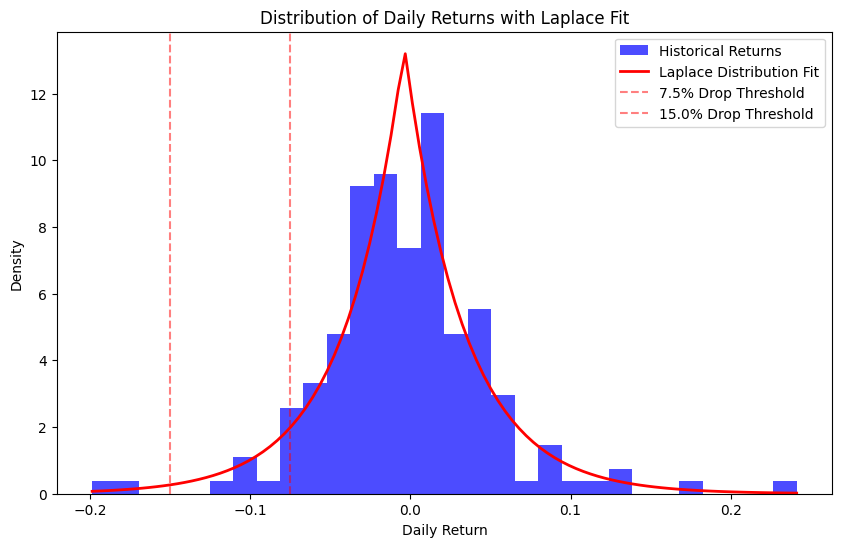

In [79]:
results = analyze_price_drops(ohlc_df_crv)

# Print probability results
for drop, probs in results['probabilities'].items():
    print(f"\nProbability of {drop}:")
    print(f"Parametric estimate: {probs['parametric_probability']:.2%}")
    print(f"Historical estimate: {probs['historical_probability']:.2%}")

# Print volatility statistics
print("\nVolatility Measures:")
print(f"Close-to-Close Volatility: {results['statistics']['close_to_close_volatility']:.2%}")
print(f"Parkinson Volatility: {results['statistics']['parkinson_volatility']:.2%}")
print(f"Garman-Klass Volatility: {results['statistics']['garman_klass_volatility']:.2%}")

# Print other statistics
print("\nOther Statistics:")
print(f"Mean Return: {results['statistics']['mean_return']:.2%}")
print(f"Skewness: {results['statistics']['skewness']:.2f}")
print(f"Kurtosis: {results['statistics']['kurtosis']:.2f}")

# Print normality test results
normality_stat, normality_p = results['statistics']['normality_test']
print(f"\nNormality Test:")
print(f"Statistic: {normality_stat:.2f}")
print(f"p-value: {normality_p:.4f}")

In [75]:
import pandas as pd
import numpy as np
from scipy import stats

def calculate_gk_volatility(df, window=30):
    """
    Calculate Garman-Klass volatility for a given OHLC DataFrame
    
    Parameters:
    df: DataFrame with 'open', 'high', 'low', 'close' columns
    window: Rolling window size (default: 30 days)
    """
    log_hl = np.log(df['high'] / df['low'])
    log_co = np.log(df['close'] / df['open'])
    
    gk_vol = np.sqrt(
        (0.5 * log_hl.pow(2) -
         (2 * np.log(2) - 1) * log_co.pow(2)
        ).rolling(window=window).mean()
    )
    return gk_vol

def calculate_traditional_beta(asset_df, index_df, window=30):
    """
    Calculate traditional beta using close prices
    
    Parameters:
    asset_df: DataFrame with asset OHLC data
    index_df: DataFrame with index OHLC data
    window: Rolling window size (default: 30 days)
    
    Returns:
    tuple: (beta, r_squared)
    """
    # Calculate returns
    asset_returns = np.log(asset_df['close'] / asset_df['close'].shift(1))
    index_returns = np.log(index_df['close'] / index_df['close'].shift(1))
    
    # Calculate rolling beta
    cov = asset_returns.rolling(window=window).cov(index_returns)
    var = index_returns.rolling(window=window).var()
    beta = cov / var
    
    # Calculate R-squared
    rolling_corr = asset_returns.rolling(window=window).corr(index_returns)
    r_squared = rolling_corr ** 2
    
    return beta, r_squared

def calculate_gk_beta(asset_df, index_df, window=30):
    """
    Calculate beta using Garman-Klass volatility
    
    Parameters:
    asset_df: DataFrame with asset OHLC data
    index_df: DataFrame with index OHLC data
    window: Rolling window size (default: 30 days)
    
    Returns:
    tuple: (gk_beta, correlation)
    """
    # Calculate GK volatilities
    asset_gk_vol = calculate_gk_volatility(asset_df, window)
    index_gk_vol = calculate_gk_volatility(index_df, window)
    
    # Calculate returns for correlation
    asset_returns = np.log(asset_df['close'] / asset_df['close'].shift(1))
    index_returns = np.log(index_df['close'] / index_df['close'].shift(1))
    
    # Calculate rolling correlation
    rolling_corr = asset_returns.rolling(window=window).corr(index_returns)
    
    # Calculate GK beta
    gk_beta = rolling_corr * (asset_gk_vol / index_gk_vol)
    
    return gk_beta, rolling_corr

def analyze_beta(asset_df, index_df, window=30):
    """
    Perform comprehensive beta analysis using both traditional and GK methods
    
    Parameters:
    asset_df: DataFrame with asset OHLC data
    index_df: DataFrame with index OHLC data
    window: Rolling window size (default: 30 days)
    
    Returns:
    tuple: (analysis_df, summary_dict)
    """
    # Calculate both types of beta
    trad_beta, r_squared = calculate_traditional_beta(asset_df, index_df, window)
    gk_beta, correlation = calculate_gk_beta(asset_df, index_df, window)
    
    # Create analysis DataFrame
    analysis = pd.DataFrame({
        'traditional_beta': trad_beta,
        'gk_beta': gk_beta,
        'r_squared': r_squared,
        'correlation': correlation
    })
    
    # Calculate summary statistics
    summary = {
        'traditional_beta': {
            'mean': trad_beta.mean(),
            'std': trad_beta.std(),
            'median': trad_beta.median(),
            'current': trad_beta.iloc[-1]
        },
        'gk_beta': {
            'mean': gk_beta.mean(),
            'std': gk_beta.std(),
            'median': gk_beta.median(),
            'current': gk_beta.iloc[-1]
        },
        'r_squared': {
            'mean': r_squared.mean(),
            'median': r_squared.median(),
            'current': r_squared.iloc[-1]
        }
    }
    
    return analysis, summary

def print_beta_summary(summary):
    """
    Print a formatted summary of beta analysis
    
    Parameters:
    summary: Dictionary containing beta analysis summary statistics
    """
    print("\nBeta Analysis Summary:")
    print("-" * 50)
    
    print("\nTraditional Beta:")
    print(f"Current: {summary['traditional_beta']['current']:.3f}")
    print(f"Mean: {summary['traditional_beta']['mean']:.3f}")
    print(f"Std Dev: {summary['traditional_beta']['std']:.3f}")
    
    print("\nGarman-Klass Beta:")
    print(f"Current: {summary['gk_beta']['current']:.3f}")
    print(f"Mean: {summary['gk_beta']['mean']:.3f}")
    print(f"Std Dev: {summary['gk_beta']['std']:.3f}")
    
    print("\nModel Fit:")
    print(f"R-squared (current): {summary['r_squared']['current']:.3f}")
    print(f"R-squared (mean): {summary['r_squared']['mean']:.3f}")


    

In [76]:
# Run analysis
analysis, summary = analyze_beta(ohlc_df_crv, ohlc_df_btc, window=30)

# Print summary
print_beta_summary(summary)

# Print recent values
print("\nRecent Analysis:")
print(analysis.tail())


Beta Analysis Summary:
--------------------------------------------------

Traditional Beta:
Current: 0.941
Mean: 1.095
Std Dev: 0.411

Garman-Klass Beta:
Current: 0.714
Mean: 1.155
Std Dev: 1.043

Model Fit:
R-squared (current): 0.412
R-squared (mean): 0.283

Recent Analysis:
                     traditional_beta   gk_beta  r_squared  correlation
time                                                                   
2024-10-30 18:38:08          1.015914  1.033013   0.520670     0.721575
2024-10-31 18:38:08          0.921183  0.907429   0.436078     0.660362
2024-11-01 18:38:08          0.948913  0.862016   0.410228     0.640490
2024-11-02 18:38:08          0.946028  0.709357   0.411810     0.641724
2024-11-03 18:38:08          0.940753  0.713686   0.411778     0.641700


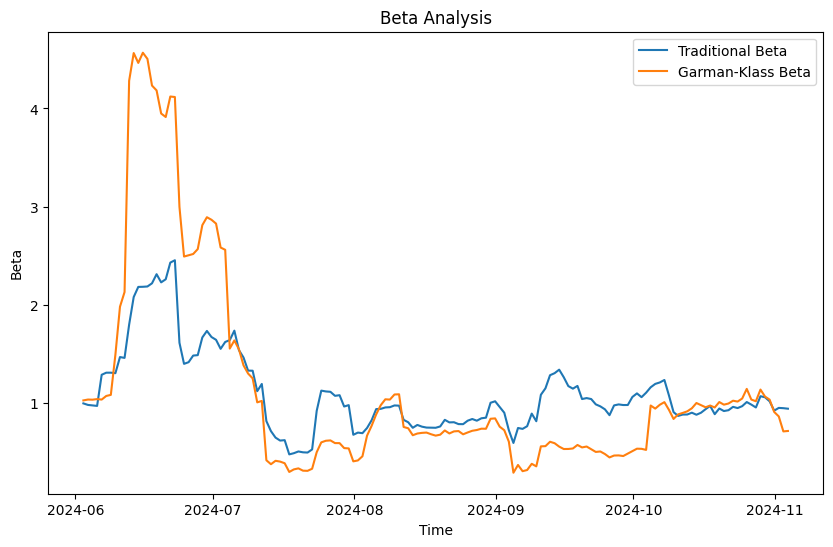

In [77]:
# Plot the beta analysis
plt.figure(figsize=(10, 6))
plt.plot(analysis['traditional_beta'], label='Traditional Beta')
plt.plot(analysis['gk_beta'], label='Garman-Klass Beta')
plt.title('Beta Analysis')
plt.xlabel('Time')
plt.ylabel('Beta')
plt.legend()
plt.show()

In [86]:
def calculate_recent_gk_volatility(ohlc_df: pd.DataFrame) -> dict:
    """
    Calculate Garman-Klass volatility for the last 60 and 15 days
    
    Parameters:
    -----------
    ohlc_df : pd.DataFrame
        DataFrame with OHLC data and datetime index
        
    Returns:
    --------
    dict
        Dictionary containing GK volatility for 60-day and 15-day periods
    """
    # Ensure the DataFrame is sorted by date
    ohlc_df = ohlc_df.sort_index()
    
    # Function to calculate GK volatility
    def gk_volatility(df):
        log_hl = (np.log(df['high'] / df['low'])) ** 2
        log_co = (np.log(df['close'] / df['open'])) ** 2
        
        return np.sqrt(
            (0.5 * log_hl) - 
            (2 * np.log(2) - 1) * log_co
        ).mean()
    
    # Get the last 60 and 15 days of data
    last_60_days = ohlc_df.last('60D')
    last_15_days = ohlc_df.last('15D')
    
    # Calculate volatilities
    volatility_60d = gk_volatility(last_60_days)
    volatility_15d = gk_volatility(last_15_days)
    
    return {
        'gk_volatility_60d': volatility_60d,
        'gk_volatility_15d': volatility_15d,
        'volatility_ratio': volatility_15d / volatility_60d if volatility_60d != 0 else None
    }

In [87]:
# Example usage:
volatilities = calculate_recent_gk_volatility(ohlc_df_crv)
print(f"60-day GK Volatility: {volatilities['gk_volatility_60d']:.2%}")
print(f"15-day GK Volatility: {volatilities['gk_volatility_15d']:.2%}")
print(f"15d/60d Volatility Ratio: {volatilities['volatility_ratio']:.2f}")

60-day GK Volatility: 2.53%
15-day GK Volatility: 2.06%
15d/60d Volatility Ratio: 0.82


C:\Users\dhruv\AppData\Local\Temp\ipykernel_828\1903597102.py:29: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_60_days = ohlc_df.last('60D')
C:\Users\dhruv\AppData\Local\Temp\ipykernel_828\1903597102.py:30: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_15_days = ohlc_df.last('15D')


In [88]:
# Example usage:
volatilities = calculate_recent_gk_volatility(ohlc_df_btc)
print(f"60-day GK Volatility: {volatilities['gk_volatility_60d']:.2%}")
print(f"15-day GK Volatility: {volatilities['gk_volatility_15d']:.2%}")
print(f"15d/60d Volatility Ratio: {volatilities['volatility_ratio']:.2f}")

60-day GK Volatility: 1.81%
15-day GK Volatility: 2.15%
15d/60d Volatility Ratio: 1.19


C:\Users\dhruv\AppData\Local\Temp\ipykernel_828\1903597102.py:29: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_60_days = ohlc_df.last('60D')
C:\Users\dhruv\AppData\Local\Temp\ipykernel_828\1903597102.py:30: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_15_days = ohlc_df.last('15D')


In [89]:
def calculate_recent_gk_beta(asset_df: pd.DataFrame, 
                             index_df: pd.DataFrame, 
                             days: int = 30) -> float:
    """
    Calculate a single Garman-Klass beta value using the most recent days of data
    
    Parameters:
    -----------
    asset_df : pd.DataFrame
        DataFrame with asset OHLC data
    index_df : pd.DataFrame
        DataFrame with index OHLC data
    days : int
        Number of recent days to consider (default: 30)
        
    Returns:
    --------
    float
        Single GK beta value for the period
    """
    # Get the last n days of data
    asset_recent = asset_df.last(f'{days}D')
    index_recent = index_df.last(f'{days}D')
    
    # Calculate GK volatility for the period
    def gk_volatility(df):
        log_hl = np.log(df['high'] / df['low'])
        log_co = np.log(df['close'] / df['open'])
        
        return np.sqrt(
            (0.5 * log_hl.pow(2) -
             (2 * np.log(2) - 1) * log_co.pow(2)
            ).mean()
        )
    
    # Calculate returns for correlation
    asset_returns = np.log(asset_recent['close'] / asset_recent['close'].shift(1))
    index_returns = np.log(index_recent['close'] / index_recent['close'].shift(1))
    
    # Calculate correlation
    correlation = asset_returns.corr(index_returns)
    
    # Calculate volatilities
    asset_gk_vol = gk_volatility(asset_recent)
    index_gk_vol = gk_volatility(index_recent)
    
    # Calculate GK beta
    gk_beta = correlation * (asset_gk_vol / index_gk_vol)
    
    return gk_beta


In [91]:

# Example usage:
beta = calculate_recent_gk_beta(ohlc_df_crv, ohlc_df_btc)
print(f"30-day GK Beta: {beta:.3f}")

30-day GK Beta: 0.712


C:\Users\dhruv\AppData\Local\Temp\ipykernel_828\876855123.py:20: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  asset_recent = asset_df.last(f'{days}D')
C:\Users\dhruv\AppData\Local\Temp\ipykernel_828\876855123.py:21: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  index_recent = index_df.last(f'{days}D')
